## Exploring a backtracker's output

In this notebook, I explore data outputted from the backtracking implementation I created for the knight's tour (see src folder, backend folder, Backtracker.py).

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
paths = pd.read_csv("knight_tour.txt", sep="\n", header=None)

In [26]:
# The last line is "Finished process"
paths = paths.drop(paths.index[len(paths) - 1])

### Simple Questions

To start off, we can answer a few quick questions.

#### How many paths are there?

In [27]:
len(paths)

154888

#### Is each path unique?

In [28]:
len(paths) == len(paths.drop_duplicates())

True

#### How many paths exist for each square in the board?

To answer this question, I decided to create a visualization of the board.

I transform these data into a single string (the starting position) entry for each path.

In [29]:
def extract_first_int(row_num):
    """ Take in a row from the df and extract the integer indicating path start.
    
    :param row_num: The row number from the data from.
    :return: An integer indicating where the path starts.
    """
    # Need to remove the inner string
    path_start = row_num[0][1:5].strip(" ' ")
    return int(path_start)

In [30]:
starts = paths.apply(extract_first_int, axis=1)

Then, I find the number of counts associated with each path.

In [31]:
counts = dict(starts.value_counts())

Now, I'm ready to process the counts into a board like structure for the visualization.

In [32]:
long_counts = [counts[position] for position in sorted(counts)]

In [33]:
count_matrix = [long_counts[x:x + 8] for x in range(0, 64, 8)]

In [34]:
df_count_matrix = pd.DataFrame(count_matrix, range(8), range(8))

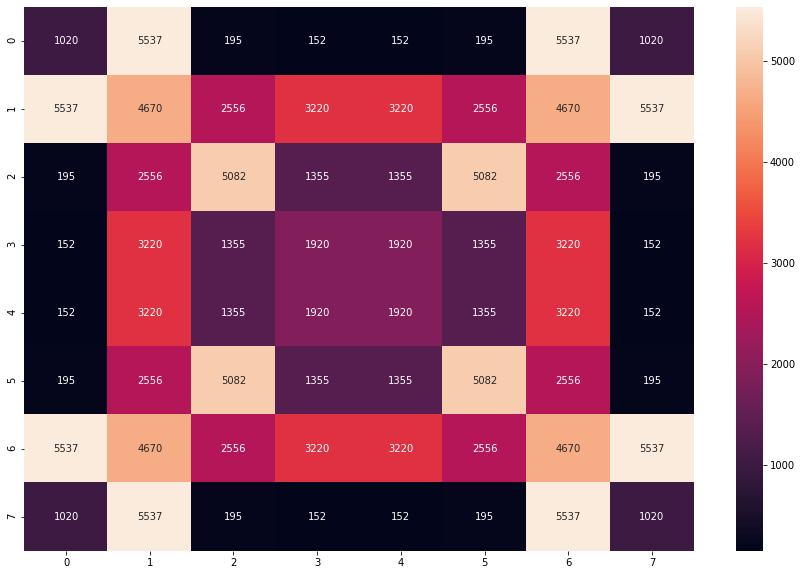

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df_count_matrix, annot=True, fmt='d')

In the words of Ronald Weasley - wicked. Notice that due to symmetry knowing a 4 by 4 quadrant will determine the other quadrants. 

It looks like the max number of paths per square 5537 and the minimum is 152. 